# ADA - Unsupervised learning

In [1]:
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [ ]:
'''
NOTE:
- labels = KMeans(n_clusters=3, random_state=42).fit_predict(X) --> returns labels list (e.g, [1,1,2,4,4...]) directly 
- kmean  = KMeans(n_clusters=3, random_state=42).fit(X) --> returns kmean output obj
    - kmean.labels_ --> [1,1,2,4,4...]) 
'''

# Part A) Tutorial

In this tutorial, you will learn how to discover clusters in data using Python.

Let's start by creating some **[synthetic](https://en.wikipedia.org/wiki/Synthetic_data)** data!
First, we create a super secret number that represents the number of the cluster to generate. 

Don't print it! We'll try to discover it automatically.

## K-Means

In [2]:
random.seed(42)
top_secret_number = random.randint(2, 10)

Now we can generate some data distributed in n groups:

In [3]:
total_samples = 100

# This create some artifical clusters with standard dev. = 2
X, _, centers = make_blobs(n_samples=total_samples, 
                           centers=top_secret_number, 
                           cluster_std=2,
                           n_features=2,
                           return_centers=True, 
                           random_state=42)
'''
- make_blobs() --> generate random data for our study.
    - n_features=2 --> 2D data i-e each datapoint has [x,y] coord

- 'X' --> array of points [x,y]. E.g, [ [1,5], [3,2], ...]

- 'centers' --> array of center points of clusters (centroids). 
    -E.g, if 3 clusters, then centers = [ [3,5], [21,30], [11,9]]
'''

# just showing 3 points
X[:3]

array([[-8.57321463, -9.90980404],
       [ 6.26691327, -0.48855895],
       [-3.44814639, 10.09940622]])

Let's see how these clusters look like and where is their center:

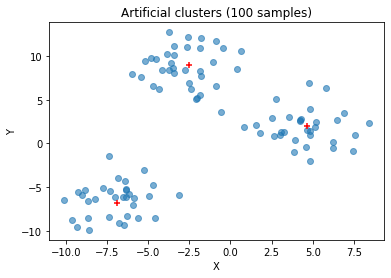

In [ ]:
plt.scatter(X[:,0], X[:,1], alpha=0.6) # X[:,0] = x-coords of all points  ,  X[:,1] = y-coords of all points
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Artificial clusters (%s samples)" % total_samples)

for c in centers:
    plt.scatter(c[0], c[1], marker="+", color="red")

### Clustering the data
How many clusters do you see? Probably easy for a human, but not so trivial for a computer. 

Let's try to group the data with K-Means. Recall that K-Means requires you to specify the number of clusters (K). Let's start by testing multiple values between 2 and 10:

/Users/abdullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/abdullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/abdullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/abdullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

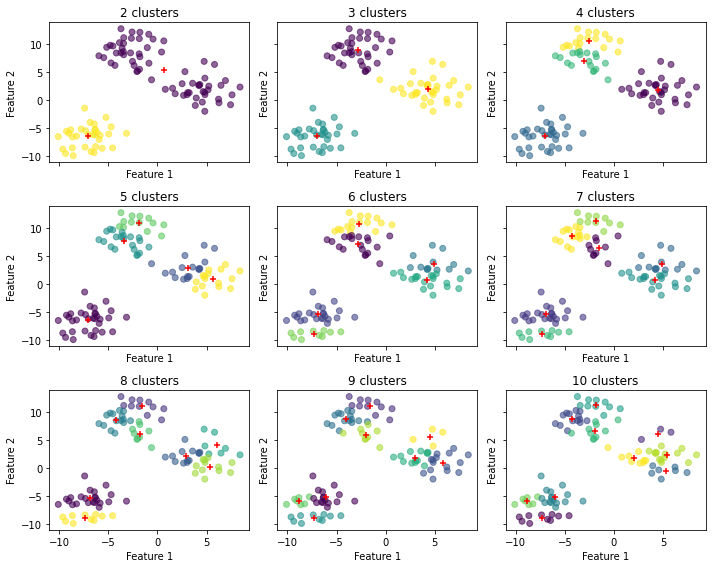

In [8]:
'''
kmean = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    - 'X': array of [x,y] coords (as in prev cell)
    - 'kmean': output obj
        - .labels_ --> a list that contains labels (int vals) for all points. E.g, [0, 3, 1, 1, 1, 4, 2,...]
            - if you give it to plt.scatter(..., c = < >) --> it displayed color acc to int val (e.,g 1=red, 2=blue, etc)
        - .cluster_centers_ --> a list of [x,y] coord for center of each cluster

'''

MIN_CLUSTERS = 2
MAX_CLUSTERS = 10

# Compute number of row and columns for plots
COLUMNS = 3
ROWS = math.ceil((MAX_CLUSTERS-MIN_CLUSTERS)/COLUMNS)
fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(10,8), sharey=True, sharex=True)

# Plot the clusters
for n_clusters in range(MIN_CLUSTERS, MAX_CLUSTERS+1):
    current_column = (n_clusters-MIN_CLUSTERS)%COLUMNS
    current_row = (n_clusters-MIN_CLUSTERS)//COLUMNS
    # Get the axis where to add the plot
    ax = axs[current_row, current_column]
    
    # Cluster the data with the current number of clusters
    kmean = KMeans(n_clusters=n_clusters, random_state=42).fit(X) # 'random_state=42' ensures reprodicibility
    
    # Plot the data by using the labels as color
    ax.scatter(X[:,0], X[:,1], c=kmean.labels_, alpha=0.6) # 'c' = color (see above for more explanation)
    ax.set_title("%s clusters"%n_clusters)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    # Plot the centroids
    for c in kmean.cluster_centers_:
        ax.scatter(c[0], c[1], marker="+", color="red")

plt.tight_layout()

### Bonus example: 
Did you know you can animate your plots?

MovieWriter ffmpeg unavailable; using Pillow instead.


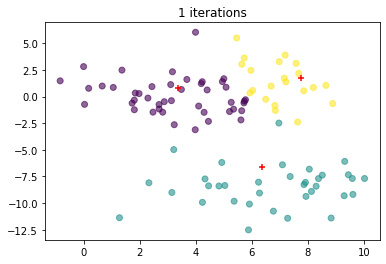

In [10]:
# same example as prev, it's just we are making a gif (clusters.gif) of how each step proceeds --> check it manually by opening gif
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()


X_3clusters, _, centers = make_blobs(n_samples=100, 
                           centers=3, 
                           cluster_std=2,
                           return_centers=True, 
                           random_state=99)

# Update frame callback 
def update(max_iter):
    # Clean the plot
    plt.clf()
    plt.cla()
    # Cluster and get the labels
    kmeans = KMeans(n_clusters=3, 
                    init="random", 
                    algorithm="lloyd",
                    random_state=10, 
                    n_init=1, max_iter=max_iter).fit(X_3clusters)
    # Plot
    plt.scatter(X_3clusters[:,0], X_3clusters[:,1], c=kmeans.labels_, alpha=0.6)
    for c in kmeans.cluster_centers_:
        plt.scatter(c[0], c[1], marker="+", color="red")
    plt.title("%s iterations" % max_iter)

# Animate 1 frame per second
anim = FuncAnimation(fig, update, frames=np.arange(1, 20), interval=500)

# Save the gif
anim.save('clusters.gif', dpi=80)

### How to select K in K-Means?

You have a couple of options:
- Silhouette score: Find the K with the desired tradeoff between the number of clusters and cohesion/separation.
- Elbow method: Find the "elbow" in the curve of the Sum of Squared Errors

Let's see what we can observe using these 2 methods.

#### Silhouette score

To generate the curve of the silhouette score, we cluster the data with different value of K and plot the resulting values.

/Users/abdullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/abdullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/abdullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/abdullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

'\nSo, best is k=3 since silhouette score is max there.\n'

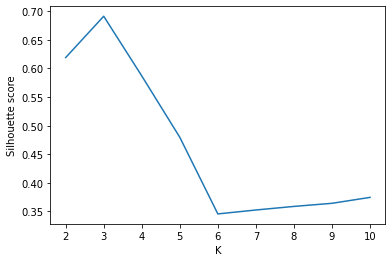

In [ ]:
silhouettes = [] # list to store k & it's score each as a dict --> [{k:score}, ...]

# Try multiple k
for k in range(2, 11):
    
    # Cluster the data and assigne the labels
    labels = KMeans(n_clusters=k, random_state=10).fit_predict(X)
    
    # Get the Silhouette score
    score = silhouette_score(X, labels)
    
    # add score to list
    silhouettes.append({"k": k, "score": score})
    
# Convert to dataframe
silhouettes = pd.DataFrame(silhouettes)

# Plot the data
plt.plot(silhouettes.k, silhouettes.score)
plt.xlabel("K")
plt.ylabel("Silhouette score")

'''
So, best is k=3 since silhouette score is max there.
'''

#### Elbow method

Similarly to the previous case, we compute the SSE for different values of K, and we plot the distribution:

/Users/abdullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/abdullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/abdullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/abdullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

Text(0, 0.5, 'Sum of Squared Errors')

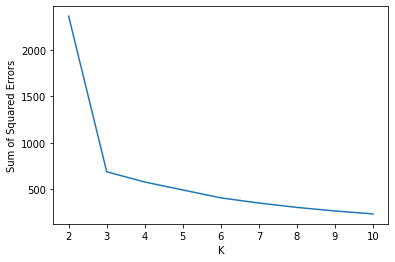

In [15]:
# exact same steps as prev
sse = []

for k in range(2, 11):
    
    # Cluster the data and assigne the labels
    kmeans = KMeans(n_clusters=k, random_state=10).fit(X)

    # Get the SSE score
    score = kmeans.inertia_ # NOTE: the only difference is here as compared to prev cell
    
    # add score to list
    sse.append({"k": k, "score": score})

# Convert to dataframe
sse = pd.DataFrame(sse)

# Plot the data
plt.plot(sse.k, sse.score)
plt.xlabel("K")
plt.ylabel("Sum of Squared Errors")

'''
NOTE: 
- unlike prev score, lower sse score means better 'k'
- best 'k' is chosen where sse score is low and at point after which score line become non-linear!

- SSE score at k=3 is low, score line is linear up till this, afterward it is no longer a straight line
- So, should go for k=3 (as also found by prev method)
'''


In this case, we get the same recommendation from both methods: K=3. Silhouette suggests that using 3 clusters is a fair tradeoff between the number of groups and their separation. The elbow method shows how the SSE reduction is less significant with more than 3 clusters.

Let's plot the best clusters:

/Users/abdullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


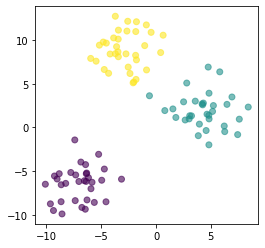

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(4,4), sharey=True)

# Plot the clusters with K = 3
labels = KMeans(n_clusters=3, random_state=0).fit_predict(X)
axs.scatter(X[:,0], X[:,1], c=labels, alpha=0.6)

'''
So, we visually see that k=3 indeed worked the best!
'''


Ultimately it is up to you (domain expert!) to pick the number of clusters that better represent the data.

The best representation, in this case, is obtained with k = 3.

-----

### Visualizing high dimensional data

Visualizing 2-dimensional data is easy, but what happens when we have more than three features? 

We can use dimensionality reduction techniques! Let start by generating some artifical clusters with 10 features. 
We use the same number of samples and groups as the previous example:

In [23]:
total_samples = 100

# This create some artifical clusters with standard dev. = 3
X10d, _ = make_blobs(n_samples=total_samples, 
                           centers=top_secret_number, 
                           cluster_std=3,
                           n_features=10,
                           random_state=0)

'''
- make_blobs() --> generate random data for our study.
    - n_features=10 --> 10-D data i-e each datapoint has 10 dimensions i-e [x1,x2,x3,...x10] coord
'''

# just to show (10-D coords of 1st datapoint in our dataset)
print("The features of the first datapoint/sample are:\n%s" % X10d[0])

The features of the first datapoint/sample are:
[ 7.05933272  4.20962197 -2.77357361  6.59147131 -6.64440614  9.47625342
 -3.01996723  7.36384861  1.41157528  1.28459274]


To transform this features vector in a form that can be represented in a simple plot, we can reduce the number of dimensions by preserving as much information as possible. Let's see two techniques that can help in this task:

- t-SNE
- PCA


Note: the next lecture will cover more theoretical aspects of these methods.

In [19]:
X_reduced_tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=0).fit_transform(X10d)

# just to show
print("The 2D features [x,y] of the first datapoint are: %s" % X_reduced_tsne[0]) 

The 2D features [x,y] of the first datapoint are: [ 3.2180345 -1.7569892]


In [20]:
X_reduced_pca = PCA(n_components=2).fit(X10d).transform(X10d)

# just to show
print("The 2D features [x,y] of the first datapoint are: %s" % X_reduced_pca[0])

The 2D features [x,y] of the first datapoint are: [-6.17922102  7.01618025]


The features are reduced in both cases to a 2d space. Please note that they are not the same because the two techniques optimize different objectives.

/Users/abdullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'PCA')

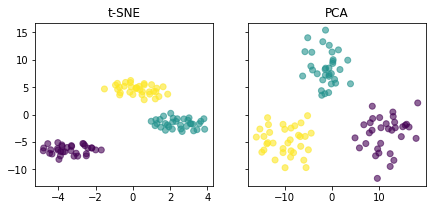

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(7,3), sharey=True)

# Cluster the data in 3 groups
labels = KMeans(n_clusters=3, random_state=0).fit_predict(X10d)

# Plot the data reduced in 2d space with t-SNE
axs[0].scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=labels, alpha=0.6) # plot all original datapoints in 2D, then colors them by c=labels
axs[0].set_title("t-SNE")

# Plot the data reduced in 2d space with PCA
axs[1].scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=labels, alpha=0.6)
axs[1].set_title("PCA")

### Density based: DBSCAN

K-Means is an intuitive and effective algorithm, but what happens when the data has a complex shape?

As for the previous example, let's generate some synthetic data that resemble two half-moons.

Text(0, 0.5, 'Feature 2')

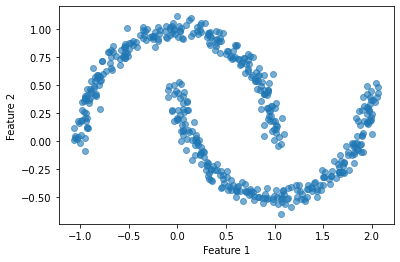

In [29]:
# Create 500 random points with 2-moons shape
X_moons, _ = make_moons(500, noise=0.05, random_state=0) # returns list of coords [[x,y], ...]

plt.scatter(X_moons[:,0], X_moons[:,1], alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

We can visually see that there are two groups. Let's assign the labels with K-Means!

/Users/abdullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


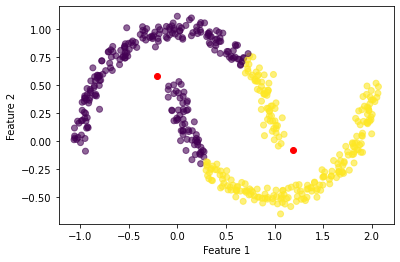

In [ ]:
kmean = KMeans(n_clusters=2, random_state=0).fit(X_moons) # performs badly!
plt.scatter(X_moons[:,0], X_moons[:,1], c=kmean.labels_, alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot the centroids
for c in kmean.cluster_centers_:
    plt.scatter(c[0], c[1], marker="o", color="red")

Let's cluster the data with DBSCAN by variating the `eps` value in the range between 0.05 and 0.15.

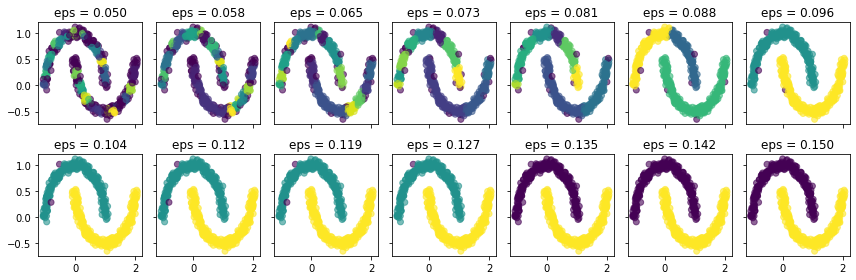

In [31]:
# Create a list of eps
eps_list = np.linspace(0.05, 0.15, 14)

# Compute number of row and columns
COLUMNS = 7
ROWS = math.ceil(len(eps_list)/COLUMNS)

fig, axs = plt.subplots(ROWS, COLUMNS, figsize=(12, 4), sharey=True, sharex=True)

for i in range(0, len(eps_list)):
    eps = eps_list[i]
    
    current_column = i%COLUMNS
    current_row = i//COLUMNS
    
    ax = axs[current_row, current_column]

    # DBSCAN runs here (similar syntax as KMeans)
    labels = DBSCAN(eps=eps).fit_predict(X_moons)
    
    ax.scatter(X_moons[:,0], X_moons[:,1], c=labels, alpha=0.6)
    ax.set_title("eps = {:.3f}".format(eps))
    
plt.tight_layout()

-------
# Part B: Exercises

## Exercise 1. Real world data! Wheat has a kernel too!


<img src="img/wheat_banner.png" width="800">

Data Set Information:

> The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

Source: https://archive.ics.uci.edu/ml/datasets/seeds



In [38]:
seeds_df = pd.read_csv("seeds_dataset.csv")
seeds_df.head()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In this exercise, we are interested in discovering structure in the data by hiding the actual label provided in the dataset.

### Question 1.1: Prepare the dataset

- Create a dataset by keeping only the meaningful features. Remove the type.
- Plot the histogram of the different features.
- The features have different scales, but we want to give the same importance to all them. Find a way to mitigate the problem.

In [39]:
# 1. remove useless features
seeds_df.drop(columns=["seedType"], inplace=True)
seeds_df.drop(columns=["ID"], inplace=True)
seeds_df.head()


,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


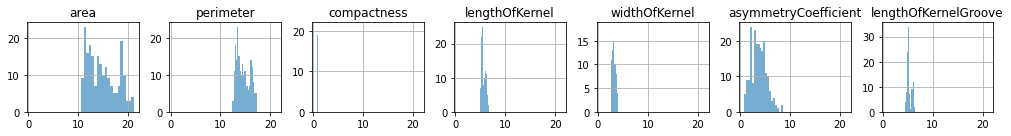

In [40]:
# 2. plot histogram of each feature

columns = seeds_df.columns

fig, axs = plt.subplots(1, len(columns), figsize=(14,2), sharex=True)

for column_idx in range(0, len(columns)):
    seeds_df[columns[column_idx]].hist(bins=20, ax=axs[column_idx], alpha=0.6)
    axs[column_idx].set_title(columns[column_idx])
    
plt.tight_layout()


In [53]:
# 3. standardize feature values

scaled_data = StandardScaler().fit(seeds_df).transform(seeds_df) 
'''
- Above line converts 'seeds_df' to numpy array with normalized vals --> [ [col1_val, col2_val,..], ...]
    - [col1_val, col2_val,..] --> a row of seeds_df 
    - ^^ is also called feature vector
    - each col_val (feature val) is normalized
'''

# just to show
print("Scaled feature vals of first datapoint/row:\n%s" %scaled_data[0])

Scaled feature vals of first datapoint/row:
[ 1.42097769e-01  2.15462437e-01  6.06017918e-05  3.04218199e-01
  1.41701823e-01 -9.86151745e-01 -3.83577423e-01]


In [54]:
scaled_data # each elem of this numpy array is a row of seeds_df i-e feature vector


array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

### Question 1.2: Cluster the data with K-Means

- Use the Elbow method to find the best value of K

/Users/abdullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/abdullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/abdullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/abdullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

'\nSo, score line becomes non-linear after k=3. So, we select k=3.\n'

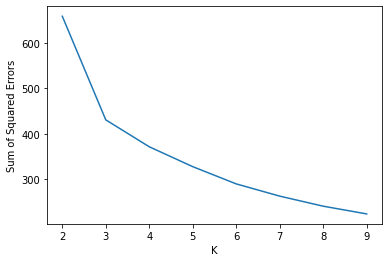

In [55]:
# exact same steps as prev
sse = []

for k in range(2, 10):
    
    # Cluster the data and assigne the labels
    kmeans = KMeans(n_clusters=k, random_state=10).fit(scaled_data) # it takes both pd dataframe & numpy array

    # Get the SSE score
    score = kmeans.inertia_ # NOTE: the only difference is here as compared to prev cell
    
    # add score to list
    sse.append({"k": k, "score": score})

# Convert to dataframe
sse = pd.DataFrame(sse)

# Plot the data
plt.plot(sse.k, sse.score)
plt.xlabel("K")
plt.ylabel("Sum of Squared Errors")

'''
So, score line becomes non-linear after k=3. So, we select k=3.
'''


### Question 1.3: Visualise your clusters

- Use t-SNE to plot your clusters
- Compare side by side 2 plots using the original labels (seedType) and the ones generated by K-Means.

/Users/abdullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Discovered clusters')

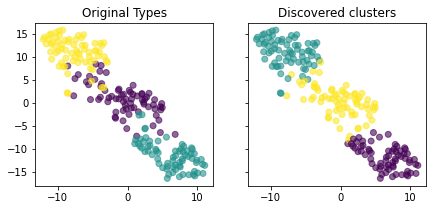

In [63]:
# original seeds data (with all cols)
seeds = pd.read_csv("seeds_dataset.csv") # we need it to get 'seedType' col which we removed in start as it was useless for KMeans

# convert high dimensional scaled data of seeds to 2D data using TSNE or PCA (ONLY for visualizing, not used in KMeans computation!)
X_2D = TSNE(n_components=2, init='random', learning_rate='auto', random_state=0).fit_transform(scaled_data)
#X_2D = PCA(n_components=2).fit(scaled_data).transform(scaled_data)

fig, axs = plt.subplots(1, 2, figsize=(7,3), sharey=True)

# plot 2D seeds data colored acc to ground-truth labels as given in 'seedType' col 
axs[0].scatter(X_2D[:,0], X_2D[:,1], c=seeds['seedType'], alpha=0.6)
axs[0].set_title("Original Types")

# do KMeans on scaled seeds data (not 2D, it was only for visualization)
labels = KMeans(n_clusters=3, random_state=0).fit_predict(scaled_data)

# plot 2D seeds data colored acc to labels returned by KMeans
axs[1].scatter(X_2D[:,0], X_2D[:,1], c=labels, alpha=0.6)
axs[1].set_title("Discovered clusters")

# Exercise 2. Real world data! More examples with Wine

> These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

Source: https://archive.ics.uci.edu/ml/datasets/wine

### Question 2.1: Assign the wine to its group

In this dataset the label is missing. Repeat the previous analysis to assign the wine to its original group.

- Select the reasonable number of clusters
- Plot the data

In [64]:
wine = pd.read_csv("wine-clustering.csv")
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


/Users/abdullah/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Discovered clusters')

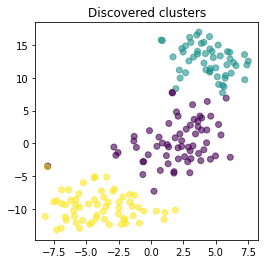

In [74]:
# standardize feature/col vals
scaled_data = StandardScaler().fit(wine).transform(wine) 

# convert high dimensional scaled data to 2D data using TSNE or PCA (ONLY for visualizing, not used in KMeans computation!)
X_2D = TSNE(n_components=2, init='random', learning_rate='auto', random_state=0).fit_transform(scaled_data)
#X_2D = PCA(n_components=2).fit(scaled_data).transform(scaled_data)

fig, ax = plt.subplots(1, 1, figsize=(4,4), sharey=True)

# do KMeans on scaled seeds data (not 2D, it was only for visualization)
labels = KMeans(n_clusters=3, random_state=0).fit_predict(scaled_data)

# plot 2D seeds data colored acc to labels returned by KMeans
ax.scatter(X_2D[:,0], X_2D[:,1], c=labels, alpha=0.6)
ax.set_title("Discovered clusters")

---------
# Part C: Quiz

### Question 1: Which of the following real-world ML applications is not unsupervised learning?
1. Netflix matrix factorization pipeline to discover users with similar interests
2. Speaker recognition (recognition of the identity of who is talking) in phones and smart assistant devices
3. LDA topic modeling on Twitter content to discover customers' opinions about a product
4. K-means clustering of Web domains 


In [ ]:
'''
Ans: (2)

- Speaker recognition (recognition of the identity of who is talking) in phones and smart assistant devices:
    - This is a supervised learning task because we need labeled data to train model
    - Ofcourse we can't tell whose speaking magically w/o having some labelled to train on

'''


### Question 2: Which of the following is true for the k-means clustering algorithm?

1. It always converges to a global optimum.
2. In each iteration, points are assigned to the closest centroid and the new centroids are recomputed.
3. It outputs the optimal number of clusters.
4. None of the above.

In [ ]:
'''
Ans: (2) , obviously

'''